<a href="https://colab.research.google.com/github/yiruchen1993/tensorflow-practice/blob/master/tf2_back_prop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

來源：深度学习入门开源书，基于TensorFlow 2.0案例实战。
https://github.com/dragen1860/Deep-Learning-with-TensorFlow-book

In [0]:
import numpy as np 
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

## 激活函數導數

In [0]:
def sigmoid(x): 
    # 实现 sigmoid 函数
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x): 
    # sigmoid 导数的计算
    # sigmoid 函数的表达式由手动推导而得
    return sigmoid(x)*(1-sigmoid(x))

findfont: Font family ['STKaiti'] not found. Falling back to DejaVu Sans.


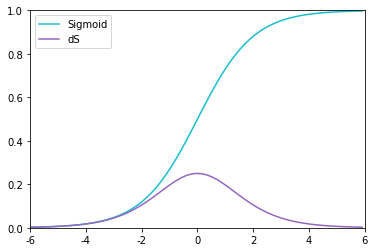

In [0]:
x = np.arange(-6.0, 6.0, 0.1)
sigmoid_y = sigmoid(x)
sigmoid_derivative_y = sigmoid_derivative(x)

plt.plot(x, sigmoid_y, color='C9', label='Sigmoid')
plt.plot(x, sigmoid_derivative_y, color='C4', label='dS')
plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.legend(loc=2)
plt.show()

In [0]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x): # ReLU 函数的导数
    d = np.array(x, copy=True) # 用于保存梯度的张量
    d[x < 0] = 0 # 元素为负的导数为 0
    d[x >= 0] = 1 # 元素为正的导数为 1
    return d

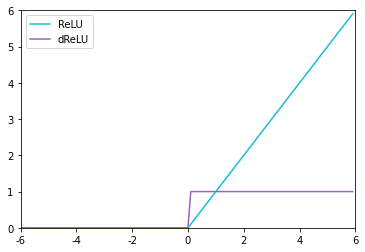

In [0]:
x = np.arange(-6.0, 6.0, 0.1)
relu_y = relu(x)
relu_derivative_y = relu_derivative(x)


plt.plot(x, relu_y, color='C9', label='ReLU')
plt.plot(x, relu_derivative_y, color='C4', label='dReLU')
plt.xlim(-6, 6)
plt.ylim(0, 6)
plt.legend(loc=2)
plt.show()

In [0]:
def leakyrelu(x, p):
    y = np.copy(x)
    y[y < 0] = p * y[y < 0]
    return y

# 其中 p 为 LeakyReLU 的负半段斜率，为超参数
def leakyrelu_derivative(x, p):
    dx = np.ones_like(x) # 创建梯度张量，全部初始化为 1
    dx[x < 0] = p # 元素为负的导数为 p
    return dx

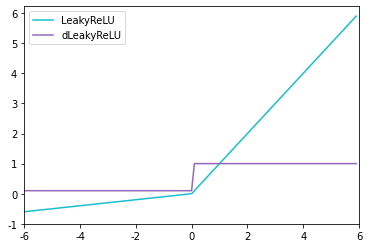

In [0]:
x = np.arange(-6.0, 6.0, 0.1)
p = 0.1
leakyrelu_y = leakyrelu(x, p)
leakyrelu_derivative_y = leakyrelu_derivative(x, p)

plt.plot(x, leakyrelu_y, color='C9', label='LeakyReLU')
plt.plot(x, leakyrelu_derivative_y, color='C4', label='dLeakyReLU')
plt.xlim(-6, 6)
plt.yticks(np.arange(-1, 7))
plt.legend(loc=2)
plt.show()

In [0]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
def tanh_derivative(x): # tanh 导数实现
    return 1-tanh(x)**2

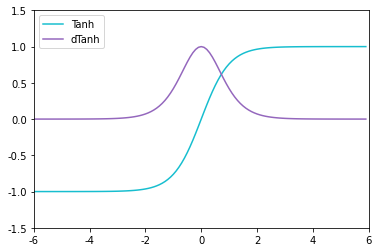

In [0]:
x = np.arange(-6.0, 6.0, 0.1)
tanh_y = tanh(x)
tanh_derivative_y = tanh_derivative(x)

plt.plot(x, tanh_y, color='C9', label='Tanh')
plt.plot(x, tanh_derivative_y, color='C4', label='dTanh')
plt.xlim(-6, 6)
plt.ylim(-1.5, 1.5)
plt.legend(loc=2)
plt.show()

## Chain Rule

In [0]:
import tensorflow as tf

# 构建待优化变量
x = tf.constant(1.)
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)

# 构建梯度记录器
with tf.GradientTape(persistent=True) as tape:
    # 非 tf.Variable 类型的张量需要人为设置记录梯度信息
    tape.watch([w1, b1, w2, b2])
    # 构建 2 层线性网络
    y1 = x * w1 + b1
    y2 = y1 * w2 + b2
    
# 独立求解出各个偏导数
dy2_dy1 = tape.gradient(y2, [y1])[0]
dy1_dw1 = tape.gradient(y1, [w1])[0]
dy2_dw1 = tape.gradient(y2, [w1])[0]

# 验证链式法则， 2 个输出应相等
print(dy2_dy1 * dy1_dw1)
print(dy2_dw1)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


### Himmelblau 函數優化實例

Himmelblau 是用來測試算法的常用範例函數之一，它包含兩個自變量$x$和$y$ \\
$$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

In [0]:
from mpl_toolkits.mplot3d import Axes3D

def himmelblau(x):
    # himmelblau 函数实现，传入参数 x 为 2 个元素的 List
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

In [0]:
x = np.arange(-6, 6, 0.1) # 可视化的 x 坐标范围为-6~6
y = np.arange(-6, 6, 0.1) # 可视化的 y 坐标范围为-6~6
print('x,y range:', x.shape, y.shape)
# 生成 x-y 平面采样网格点，方便可视化
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)
Z = himmelblau([X, Y]) # 计算网格点上的函数值

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


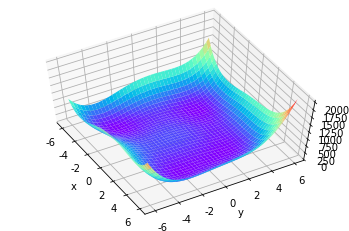

In [0]:
# 绘制 himmelblau 函数曲面
fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d') # 设置 3D 坐标轴
ax.plot_surface(X, Y, Z, cmap = plt.cm.rainbow ) # 3D 曲面图
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [0]:
# 参数的初始化值对优化的影响不容忽视，可以通过尝试不同的初始化值，
# 检验函数优化的极小值情况
# [1., 0.], [-4, 0.], [4, 0.]
# 初始化参数
x = tf.constant([1., 0.]) 

for step in range(200):# 循环优化 200 次
    with tf.GradientTape() as tape: #梯度跟踪
        tape.watch([x]) # 加入梯度跟踪列表
        y = himmelblau(x) # 前向传播
    
    # 反向传播
    grads = tape.gradient(y, [x])[0]
    # 更新参数,0.01 为学习率
    x -= 0.01*grads
    # 打印优化的极小值
    if step % 20 == 19:
        print ('step {}: x = {}, f(x) = {}'.format(step, x.numpy(), y.numpy()))

step 19: x = [3.0237594 1.9392654], f(x) = 0.09213817864656448
step 39: x = [3.000069  1.9998333], f(x) = 7.585115326946834e-07
step 59: x = [3.0000002 1.9999995], f(x) = 4.547473508864641e-12
step 79: x = [3.        1.9999999], f(x) = 2.2737367544323206e-13
step 99: x = [3.        1.9999999], f(x) = 2.2737367544323206e-13
step 119: x = [3.        1.9999999], f(x) = 2.2737367544323206e-13
step 139: x = [3.        1.9999999], f(x) = 2.2737367544323206e-13
step 159: x = [3.        1.9999999], f(x) = 2.2737367544323206e-13
step 179: x = [3.        1.9999999], f(x) = 2.2737367544323206e-13
step 199: x = [3.        1.9999999], f(x) = 2.2737367544323206e-13


## Back-prop 實例

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def load_dataset():
    # 采样点数
    N_SAMPLES = 2000
    # 测试数量比率
    TEST_SIZE = 0.3
    # 利用工具函数直接生成数据集
    X, y = make_moons(n_samples=N_SAMPLES, noise=0.2, random_state=100)
    # 将 2000 个点按着 7:3 分割为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
    return X, y, X_train, X_test, y_train, y_test

In [0]:
def make_plot(X, y, plot_name, XX=None, YY=None, preds=None, dark=False):
    # 绘制数据集的分布， X 为 2D 坐标， y 为数据点的标签
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16, 12))
    axes = plt.gca()
    axes.set(xlabel="$x_1$", ylabel="$x_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if XX is not None and YY is not None and preds is not None:
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha=1, cmap=plt.cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    # 绘制散点图，根据标签区分颜色
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='none')
    plt.show()

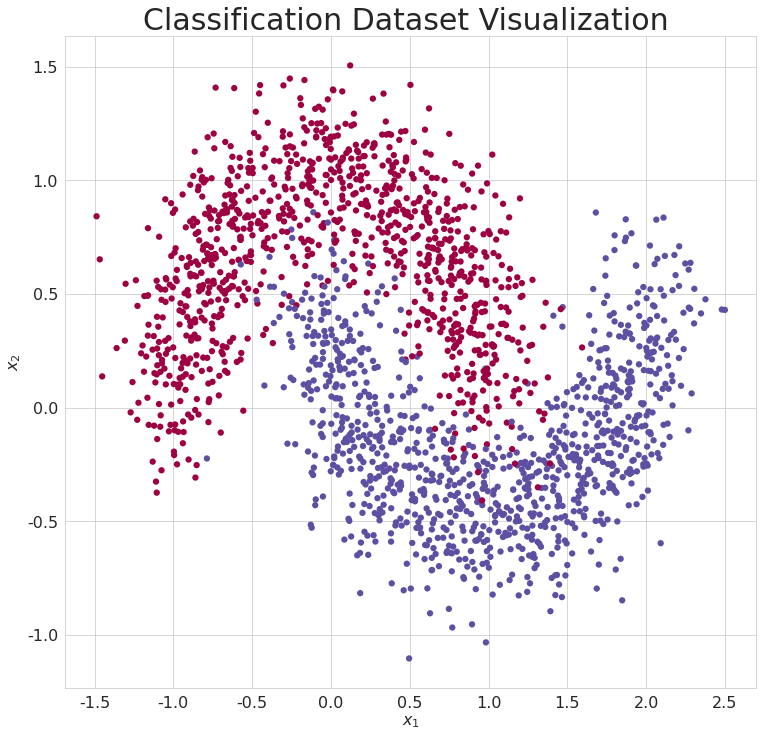

In [0]:
X, y, X_train, X_test, y_train, y_test = load_dataset()
# 调用 make_plot 函数绘制数据的分布，其中 X 为 2D 坐标， y 为标签
make_plot(X, y, "Classification Dataset Visualization ")

In [0]:
class Layer:
    # 全连接网络层
    def __init__(self, n_input, n_neurons, activation=None, weights=None,
                 bias=None):
        """
        :param int n_input: 输入节点数
        :param int n_neurons: 输出节点数
        :param str activation: 激活函数类型
        :param weights: 权值张量，默认类内部生成
        :param bias: 偏置，默认类内部生成
        """
        # 通过正态分布初始化网络权值，初始化非常重要，不合适的初始化将导致网络不收敛
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons) * np.sqrt(1 / n_neurons)
        self.bias = bias if bias is not None else np.random.rand(n_neurons) * 0.1
        self.activation = activation  # 激活函数类型，如’sigmoid’
        self.last_activation = None  # 激活函数的输出值o
        self.error = None  # 用于计算当前层的delta 变量的中间变量
        self.delta = None  # 记录当前层的delta 变量，用于计算梯度

    # 网络层的前向传播函数实现如下，其中last_activation 变量用于保存当前层的输出值：
    def activate(self, x):
        # 前向传播函数
        r = np.dot(x, self.weights) + self.bias  # X@W+b
        # 通过激活函数，得到全连接层的输出o
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    # 上述代码中的self._apply_activation 函数实现了不同类型的激活函数的前向计算过程，
    # 尽管此处我们只使用Sigmoid 激活函数一种。代码如下：
    def _apply_activation(self, r):
        # 计算激活函数的输出
        if self.activation is None:
            return r  # 无激活函数，直接返回
        # ReLU 激活函数
        elif self.activation == 'relu':
            return np.maximum(r, 0)
        # tanh 激活函数
        elif self.activation == 'tanh':
            return np.tanh(r)
        # sigmoid 激活函数
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    # 针对于不同类型的激活函数，它们的导数计算实现如下：
    def apply_activation_derivative(self, r):
        # 计算激活函数的导数
        # 无激活函数，导数为1
        if self.activation is None:
            return np.ones_like(r)
        # ReLU 函数的导数实现
        elif self.activation == 'relu':
            grad = np.array(r, copy=True)
            grad[r > 0] = 1.
            grad[r <= 0] = 0.
            return grad
        # tanh 函数的导数实现
        elif self.activation == 'tanh':
            return 1 - r ** 2
        # Sigmoid 函数的导数实现
        elif self.activation == 'sigmoid':
            return r * (1 - r)
        return r

In [0]:
# 神经网络模型
class NeuralNetwork:
    def __init__(self):
        self._layers = []  # 网络层对象列表

    def add_layer(self, layer):
        # 追加网络层
        self._layers.append(layer)

    # 网络的前向传播只需要循环调各个网络层对象的前向计算函数即可，代码如下：
    # 前向传播
    def feed_forward(self, X):
        for layer in self._layers:
            # 依次通过各个网络层
            X = layer.activate(X)
        return X

    def backpropagation(self, X, y, learning_rate):
        # 反向传播算法实现
        # 前向计算，得到输出值
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):  # 反向循环
            layer = self._layers[i]  # 得到当前层对象
            # 如果是输出层
            if layer == self._layers[-1]:  # 对于输出层
                layer.error = y - output  # 计算2 分类任务的均方差的导数
                # 关键步骤：计算最后一层的delta，参考输出层的梯度公式
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:  # 如果是隐藏层
                next_layer = self._layers[i + 1]  # 得到下一层对象
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                # 关键步骤：计算隐藏层的delta，参考隐藏层的梯度公式
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        # 循环更新权值
        for i in range(len(self._layers)):
            layer = self._layers[i]
            # o_i 为上一网络层的输出
            o_i = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            # 梯度下降算法，delta 是公式中的负数，故这里用加号
            layer.weights += layer.delta * o_i.T * learning_rate

    def train(self, X_train, X_test, y_train, y_test, learning_rate, max_epochs):
        # 网络训练函数
        # one-hot 编码
        y_onehot = np.zeros((y_train.shape[0], 2))
        y_onehot[np.arange(y_train.shape[0]), y_train] = 1
        print(y_onehot)

        # 将One-hot 编码后的真实标签与网络的输出计算均方误差，并调用反向传播函数更新网络参数，循环迭代训练集1000 遍即可
        mses = []
        accuracys = []
        for i in range(max_epochs + 1):  # 训练1000 个epoch
            for j in range(len(X_train)):  # 一次训练一个样本
                # print("y_onehot[j]:", y_onehot[j])
                self.backpropagation(X_train[j], y_onehot[j], learning_rate)
            if i % 10 == 0:
                # 打印出MSE Loss
                mse = np.mean(np.square(y_onehot - self.feed_forward(X_train)))
                mses.append(mse)
                accuracy = self.accuracy(self.predict(X_test), y_test.flatten())
                accuracys.append(accuracy)
                print('Epoch: #%s, MSE: %f' % (i, float(mse)))
                # 统计并打印准确率
                print('Accuracy: %.2f%%' % (accuracy * 100))
        return mses, accuracys

    def predict(self, X):
        return self.feed_forward(X)

    def accuracy(self, X, y):
        return np.sum(np.equal(np.argmax(X, axis=1), y)) / y.shape[0]

In [0]:
nn = NeuralNetwork()  # 实例化网络类
nn.add_layer(Layer(2, 25, 'sigmoid'))  # 隐藏层 1, 2=>25
nn.add_layer(Layer(25, 50, 'sigmoid'))  # 隐藏层 2, 25=>50
nn.add_layer(Layer(50, 25, 'sigmoid'))  # 隐藏层 3, 50=>25
nn.add_layer(Layer(25, 2, 'sigmoid'))  # 输出层, 25=>2
mses, accuracys = nn.train(X_train, X_test, y_train, y_test, 0.01, 10)

Streaming output truncated to the last 5000 lines.
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_onehot[j]: [0. 1.]
y_onehot[j]: [1. 0.]
y_on